# Homework 2: Control Structures

Robert Garbutt
Section 101

** Submit this notebook to bCourses to receive credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW02.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Binomial Coefficients

[Adapted from Newman, Exercise 2.11] The binomial coefficient $n \choose k$ is an integer equal to

$$ {n \choose k} = \frac{n!}{k!(n-k)!} = \frac{n \times (n-1) \times (n-2) \times \cdots \times (n-k + 1)}{1 \times 2 \times \cdots \times k} $$

when $k \geq 1$, or ${n \choose 0} = 1$ when $k=0$. (The special case $k=0$ can be included in the general definition by using the conventional definition $0! \equiv 1$.)

1. Write a function `factorial(n)` that takes an integer $n$ and returns $n!$ as an integer. It should yield $1$ when $n=0$. You may assume that the argument will also be an integer greater than or equal to 0.

1. Using the form of the binomial coefficient given above, write a function `binomial(n,k)` that calculates the binomial coefficient for given $n$ and $k$. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where $k=0$. (Hint: Use your `factorial` function from Part 1.)

1. Using your `binomial` function, write a function `pascals_triangle(N)` to print out the first $N$ lines of "Pascal's triangle" (starting with the $0$th line). The $n$th line of Pascal's triangle contains $n+1$ numbers, which are the coefficients $n \choose 0$, $n \choose 1$, and so on up to $n \choose n$. Thus the first few lines are
        1
        1 1
        1 2 1
        1 3 3 1
        1 4 6 4 1     
This would be the result of `pascals_triangle(5)`. Print the first 15 rows of Pascal's triangle.
        
1. The probability that an ubiased coin, tossed $n$ times, will come up heads $k$ times is ${n \choose k} / 2^n$. (Or instead of coins, perhaps you'd prefer to think of spins measured in a [Stern-Gerlach experiment](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment).)
    - Write a function `heads_exactly(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads exactly $k$ times.
    - Write a function `heads_atleast(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads $k$ or more times.
    - Print the probabilities (to three decimal places) that a coin tossed 100 times comes up heads exactly 60 times, and at least 60 times. You should print corresponding statements with the numbers so it is clear what they each mean.

1. Along with the printed statements from Part 4, have your code generate and display two labelled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$. You should have values of $k$ on the $x$-axis, and probabilities on the $y$-axis. (Note that $k$ only takes integer values from 0 to $n$, inclusive. Your plots can be connected curves or have discrete markers for each point; either is fine.)

#### Output

To summarize, your program should output the following things:

1. The first 15 rows of Pascal's triangle
1. The probabilities (to three decimal places) that a coin tossed 100 times comes up heads exactly 60 times, and at least 60 times, with corresponding statements so it is clear what each number signifies.
1. Two labeled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$, representing probability distributions for 100 coin flips.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


First fifteen rows of Pascal's Triangle:

 1
 1 1
 1 2 1
 1 3 3 1
 1 4 6 4 1
 1 5 10 10 5 1
 1 6 15 20 15 6 1
 1 7 21 35 35 21 7 1
 1 8 28 56 70 56 28 8 1
 1 9 36 84 126 126 84 36 9 1
 1 10 45 120 210 252 210 120 45 10 1
 1 11 55 165 330 462 462 330 165 55 11 1
 1 12 66 220 495 792 924 792 495 220 66 12 1
 1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
 1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1

The probability that a coin flipped 100 times yields heads exactly 60 times:  0.011
The probability that a coin flipped 100 times yields heads atleast 60 times:  0.028


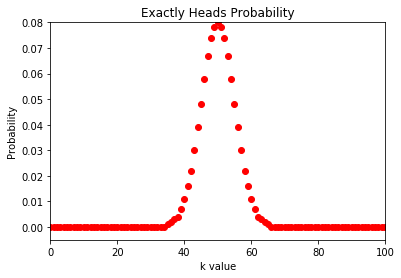

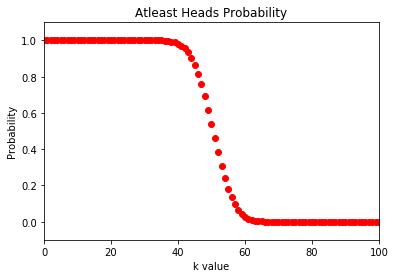

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def factorial(n):     #Takes a number and gives back its factorial
    if n <= 1:        #If n is equal to 0 or 1, returns 1 
        return 1
    else:
        i = 1
        multiple = 1    #Multiplies all the numbers below the number with itself
        while i <= n:
            multiple = i*multiple
            i+=1
    return multiple

def binomial(n,k):
    if k < 0:
        return "NaN" #Makes sure each entry is greater than or equal to zero
    elif n < 0:
        return "NaN"
    elif k == 0:
        return 1
    elif n == 0:
        return 1
    elif k > n:
        return "NaN"
    else:
        x = factorial(n)//factorial(k)//factorial(n-k) #Computes the binomial
        return x

def pascal_layer(n):          #Generates the (n-1) row of pascal's triangle
    i = 0
    count = ""
    while i <= n:
        count = count + " " + str(binomial(n,i))
        i+=1
    return count

def pascals_triangle(Num_of_rows):      #prints the number of desired rows of Pascal's triangle
    k = 0
    while k <= Num_of_rows-1:
        print(pascal_layer(k))
        k +=1
        
print("First fifteen rows of Pascal's Triangle:")       #Prints the 15 row Pascal's triangle
print()        
pascals_triangle(15)
print()

def heads_exactly(n,k):
    prob = binomial(n,k)/2**n #Finding the probability for exactly k heads out of n flips
    return '%.3f'%(prob) #Truncates to 3 decimal places

def heads_atleast(n,k):
    count = k
    summation = 0.
    while count <= n:
        summation = summation + float(heads_exactly(n, count))    #sums up the probabilities for each exact value equal to and above k
        count += 1
    return '%.3f'%(summation)

print("The probability that a coin flipped 100 times yields heads exactly 60 times: ", heads_exactly(100,60))
print("The probability that a coin flipped 100 times yields heads atleast 60 times: ", heads_atleast(100,60))

i = 0
plt.figure()
plt.title('Exactly Heads Probability')       #Graph of the Gaussian-esque curve with axes labels and title
plt.xlim(0,100)    #
plt.ylim(-0.005,.08)    
plt.xlabel('k value')
plt.ylabel('Probability')
while i <= 100:
    plt.plot(i, float(heads_exactly(100,i)),'ro')
    i = i + 1
plt.show()

j = 0
plt.figure()
plt.title('Atleast Heads Probability')      #Graph of the atleast heads prob with axes labels and title
plt.xlim(0,100)    #
plt.ylim(-0.1,1.1)    
plt.xlabel('k value')
plt.ylabel('Probability')
while j <= 100:
    plt.plot(j, float(heads_atleast(100,j)),'ro')
    j = j + 1
plt.show()

## Problem 2: Semi-Empirical Mass Formula

[Adapted from Newman, Exercise 2.10] In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximte nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$ and mass number $A$:

$$ B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A-2Z)^2}{A} + \frac{a_5}{A^{1/2}}, $$

where, in units of millions of electron volts (MeV), the constants are $a_1 = 15.67$, $a_2 = 17.23$, $a_3 = 0.75$, $a_4 = 93.2$, and

$$ a_5 = \begin{cases}
0 & \text{if } A \text{ is odd,}\\
12.0 & \text{if } A \text{ and } Z \text{ are both even,} \\
-12.0 & \text{if } A \text{ is even and } Z \text{ is odd.}
\end{cases} $$

1. Write a function `binding_energy(A, Z)` that takes as its input the values of $A$ and $Z$, and returns the binding energy for the corresponding atom. Check your function by computing the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The correct answer is around 490 MeV.)

1. Write a function `binding_energy_per_nucleon(A, Z)` which returns not the total binding energy $B$, but the binding energy per nucleon, which is $B/A$.

1. Write a function `max_binding_energy_per_nucleon(Z)` which takes as input just a single value of the atomic number $Z$ and then goes through all values of $A$ from $A = Z$ to $A = 3Z$, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your function return the value of $A$ for this most stable nucleus and the value of the binding energy per nucleon.

1. Finally, use the functions you've written to write a program which runs through all values of $Z$ from 1 to 100 and prints out the most stable value of $A$ for each one. At what value of $Z$ does the maxium binding energy per nucleon occur? (The true answer, in real life, is $Z = 28$, which is nickel. You should find that the semi-empirical mass formula gets the answer roughly right, but not exactly.)

#### Output

Your final output should look like

    Z =   1 : most stable A is 2
    Z =   2 : most stable A is 4
          .
          .
          .
    Z =  10 : most stable A is 20
    Z =  11 : most stable A is 23
          .
          .
          .
    Z = 100 : most stable A is 210
    The most stable Z is ____
    with binding energy per nucleon ____

With the ...'s and ____'s replaced with your results. The binding energy per nucleon in the last line should have three decimal places.

For maximum readability, you should include the extra whitespace around the $Z =$ numbers so everything lines up, as shown. (To remember the `print` formatting syntax to do this, see Table 1.1 in the Ayars text.)

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


In [80]:
import numpy as np

def binding_energy(A, Z): #Takes A and Z, and determines the binding energy in Mev
    a_1 = 15.67         #List of constants
    a_2 = 17.23
    a_3 = 0.75
    a_4 = 93.2
    
    if A%2 == 1:       #Statement to determine the a_5 constant
        a_5 = 0
    elif A%2 == 0 and Z%2 == 0:
        a_5 = 12.0 
    elif A%2 ==0 and Z%1 == 0:
        a_5 = -12.0

    b_energy = a_1*A-a_2*A**(2/3)-a_3*Z**2/A**(1/3)-a_4*(A-2*Z)**2/A+a_5/A**(1/2)      #Computes the binding energy                 
    return b_energy

def binding_energy_per_nucleon(A, Z): #Computes the Binding Energy per Nucleon
    x = binding_energy(A,Z)/A
    return x

def max_binding_energy_per_nucleon(Z, X):        #Returns Most Stable Atomic mass for a corresponding Z using the formula.
                                                 #If X is 'A' then returns the corresponding max mass value and otherwise returns largest mass per nucleon
    Largest_energy_per = 0    #Counter to contain most stable nucleon
    A = Z
    atomic_mass_max = 1
    while A <= 3*Z:
        if Largest_energy_per <= binding_energy_per_nucleon(A,Z):          #Checks if value has largest energy per nucleon, if not, sets equal to largest value
            Largest_energy_per = binding_energy_per_nucleon(A,Z)
            atomic_mass_max = A
        A+=1
        
    if X == 'A':
        return atomic_mass_max
    else:
        return Largest_energy_per
    

def Stable_value_for_Mass_and_Atomic_number(Z):    #Returns all of the stable Atomic mass corresponding to Atomic number
                                                   #Returns most stable of the 100 elements and it's energy per nucleon
    Largest_energy_per = 0                         #counters
    Atomic_Number_max = 0
    
    for i in range(1,Z+1):
        print("Z = ", i, ": Most stable A is", max_binding_energy_per_nucleon(i, 'A'))   #Takes the Atomic mass portion of the prior function
        if Largest_energy_per <= max_binding_energy_per_nucleon(i, ''):                  #Checks to see if largest binding energy per nucleon, if not assigns to new value
            Largest_energy_per = max_binding_energy_per_nucleon(i, '')                   #Also assigns the correct atomic number corresponding to largest binding energy per nucleon
            Atomic_Number_max = i

    print('The most stable Z is', '%.3f'%(Largest_energy_per))              #prints the results
    print('with binding energy per nucleon', Atomic_Number_max) 
        
        

Stable_value_for_Mass_and_Atomic_number(100)


Z =  1 : Most stable A is 1
Z =  2 : Most stable A is 4
Z =  3 : Most stable A is 6
Z =  4 : Most stable A is 8
Z =  5 : Most stable A is 10
Z =  6 : Most stable A is 12
Z =  7 : Most stable A is 15
Z =  8 : Most stable A is 16
Z =  9 : Most stable A is 19
Z =  10 : Most stable A is 20
Z =  11 : Most stable A is 23
Z =  12 : Most stable A is 24
Z =  13 : Most stable A is 27
Z =  14 : Most stable A is 28
Z =  15 : Most stable A is 31
Z =  16 : Most stable A is 32
Z =  17 : Most stable A is 35
Z =  18 : Most stable A is 36
Z =  19 : Most stable A is 39
Z =  20 : Most stable A is 41
Z =  21 : Most stable A is 43
Z =  22 : Most stable A is 46
Z =  23 : Most stable A is 47
Z =  24 : Most stable A is 50
Z =  25 : Most stable A is 51
Z =  26 : Most stable A is 54
Z =  27 : Most stable A is 55
Z =  28 : Most stable A is 58
Z =  29 : Most stable A is 59
Z =  30 : Most stable A is 62
Z =  31 : Most stable A is 63
Z =  32 : Most stable A is 66
Z =  33 : Most stable A is 69
Z =  34 : Most stable A

## Problem 3: Particle in a Box

[Adapted from Ayars, Problem 3-1] The energy levels for a quantum particle in a three-dimensional rectangular box of dimensions $\{L_1, L_2, \text{ and } L_3\}$ are given by

$$ E_{n_1, n_2, n_3} = \frac{\hbar^2 \pi^2}{2m} \left[ \frac{n_1^2}{L_1^2} + \frac{n_2^2}{L_2^2} + \frac{n_3^2}{L_3^2} \right] $$

where the $n$'s are integers greater than or equal to one. Your goal is to write a program that will calculate, and list in order of increasing energy, the values of the $n$'s for the 10 lowest *different* energy levels, given a box for which $L_2 = 2L_1$ and $L_3 = 4L_1$.

Your program should include two user-defined functions that you may find helpful in accomplishing your goal:

1. A function `energy(n1, n2, n3)` that takes integer values $n_1$, $n_2$, and $n_3$, and computes the corresponding energy level in units of $\hbar^2 \pi^2/2 m L_1^2$.

1. A function `lowest_unique_K(K, List)` which takes a positive integer $K$ and a list of real numbers `List`, and returns an ordered (ascending) list of the lowest $K$ unique numbers in the list `List`. For instance, `lowest_unique_K(3, [-0.5, 3, 3, 2, 6, 7, 7])` would return `[-0.5, 2, 3]`. The function should not modify the original list `List`.
    - As with most programming puzzles, there are several ways to write this function. Depending on how you do it, you may or may not find it helpful to recall "Program 9" in the Workshop's "Debugging Practice" (about copying lists), or to Google how to "sort" lists, or how to "del" or "pop" items out of lists.
    
You may also wish to make other user-defined functions depending on how you go about solving the problem. In fact, if you find some clever way to solve the problem that doesn't use `lowest_unique_K`, that is fine too! (You still need to write `lowest_unique_K`, though.) But whatever you do, be sure to comment your code clearly!

#### Output

Your final output should look like this (though with different numbers, and not necessarily the same number of lines):

    energy, n1, n2, n3
    (0.4375, 1, 1, 1)
    (0.625, 1, 2, 1)
    (0.8125, 2, 1, 1)
    (0.9375, 1, 3, 1)
    (1.0, 2, 2, 1)
    (1.1875, 1, 1, 2)
    (1.3125, 2, 3, 1)
    (1.375, 1, 2, 2)
    (1.375, 1, 4, 1)
    (1.4375, 3, 1, 1)
    (1.5625, 2, 1, 2)

Notice how there are only 10 unique energies listed, but more than 10 lines. Each line could also have brackets instead of parentheses if you prefer, like this: `[0.4375, 1, 1, 1]`.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!

#### Just for fun

If you'd like, write a function `print_table(list_of_lists)` that takes  a list of lists (or a list of tuples) and prints them in a nicely aligned table. Feel free to Google to get ideas on how to do this. Try to get your function to produce something like

    energy  n1 n2 n3
    0.4375  1  1  1
    0.625   1  2  1
    0.8125  2  1  1
    0.9375  1  3  1
    1.0     2  2  1
    1.1875  1  1  2
    1.3125  2  3  1
    1.375   1  2  2
    1.375   1  4  1
    1.4375  3  1  1
    1.5625  2  1  2

In [188]:
import numpy as np

def energy(n_1, n_2, n_3):  #Energy level in units of hbar^2*pi^2/(2ml_1^2)
    energy = (n_1**2+n_2**2/4+n_3**2/16)
    return energy

def lowest_unique_K( K , list): #takes a multidimensional list, keeps and sorts a certain number of first position unique solutions
    x = sorted(list, key=lambda k: k[0])
    y = []
    for i in range(0,len(x)):   #Checks if the first element is a repitition, if so, skips that element then adds the next
        if len(y) == K:         #unique combination to y, so you are left with unique energies in numerical order
            return y
        elif x[i][0] != x[i-1][0]: 
            y.append(x[i])
            
def energy_per_n(n):  #gives an array that holds the ten unique energies in numerical order, with their associated n_1,n_2,n_3 with them
    Energy = []       #gives n elements excluding [0,0,0,0]
    for i in range(0,4):
        for z in range(0,4):
            for a in range(0,4):
                Energy.append([energy(i,z,a),i,z,a]) 
    z = lowest_unique_K(n+1,Energy)                  #We exclude the case n_1=0,n_2=0,n_3=0 since its not interesting
    return z

print('energy, n1, n2, n3')
for i in range(1, len(energy_per_n(10))):
    print(energy_per_n(10)[i])


energy, n1, n2, n3
[0.0625, 0, 0, 1]
[0.25, 0, 0, 2]
[0.3125, 0, 1, 1]
[0.5, 0, 1, 2]
[0.5625, 0, 0, 3]
[0.8125, 0, 1, 3]
[1.0, 0, 2, 0]
[1.0625, 0, 2, 1]
[1.25, 0, 2, 2]
[1.3125, 1, 1, 1]
